# Setting Up

In [367]:
!pip install pingouin
!pip install bioinfokit

In [368]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style("white")
sns.set_theme(style="ticks")
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
import bioinfokit.analys
from bioinfokit.analys import stat
import sklearn

# EDA & Preprocessing

In [369]:
#Import data and set view
df = pd.read_csv('diabetes.csv')
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [370]:
#Seeing description
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

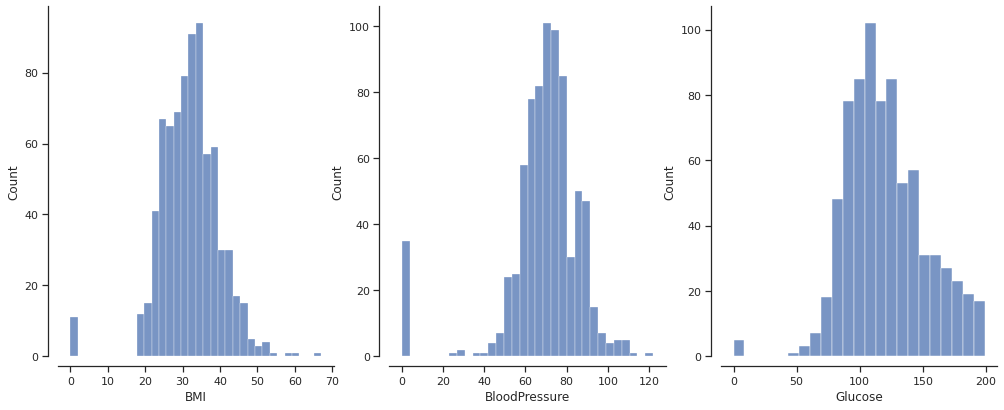

In [371]:
#Distributions of BMI, Blood Pressure, Glucose
fig, axs = plt.subplots(ncols=3)

sns.histplot(x='BMI', palette='pastel',data=df, ax=axs[0])
sns.histplot(x='BloodPressure', palette='pastel', data=df, ax=axs[1])
sns.histplot(x='Glucose', palette='pastel',data=df, ax=axs[2]);

fig.set_size_inches(15, 6)
sns.despine(offset=10, trim=False)

In [372]:
#Exploring Diastolic Blood Pressure and Plasma Glucose Concentration as predictors of BMI
#Creating categorical variables through binning

#Binning Glucose by standard mml levels, assuming data is collected at fasted state
df['GlucoseRange'] = pd.cut(x=df['Glucose'], bins=[40, 99, 125, 200],
                     labels=['Normal mml', 'Impaired mml', 'Diabetic mml'])

#Binning blood pressure by standard diastolic levels
df['BloodPressureRange'] = pd.cut(x=df['BloodPressure'], bins=[0, 60, 80, 125],
                     labels=['Low BP','Regular BP','High BP'])

#Dropping rows with zero-value BMI or Blood Pressure or GLucose to avoid skew
#This is possible because of relatively small sample of instances with zero-value BMI or Blood Pressure or Glucose

df.dropna(inplace=True)
df = df[df.BMI != 0]

In [373]:
#Seeing description with na rows dropped 
print("Descriptive Stats")
print(df[['Glucose','BloodPressure','BMI']].describe())
print("")
print("Data Skew")
print(df[['Glucose','BloodPressure','BMI']].skew())

Descriptive Stats
          Glucose  BloodPressure         BMI
count  724.000000     724.000000  724.000000
mean   121.882597      72.400552   32.467127
std     30.750030      12.379870    6.888941
min     44.000000      24.000000   18.200000
25%     99.750000      64.000000   27.500000
50%    117.000000      72.000000   32.400000
75%    142.000000      80.000000   36.600000
max    199.000000     122.000000   67.100000

Data Skew
Glucose          0.527117
BloodPressure    0.137629
BMI              0.598186
dtype: float64


Text(29.335, 0.5, 'BMI')

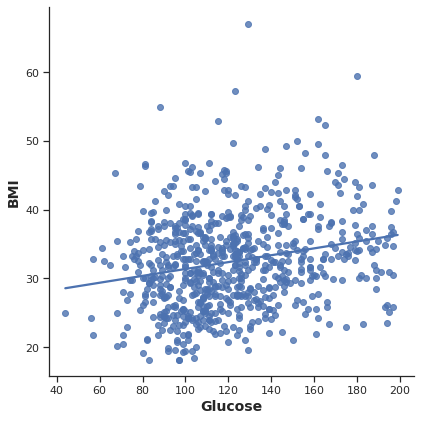

In [374]:
#Discovering relationship between Glucose and BMI
sns.lmplot(x='Glucose', y='BMI', data=df, palette='muted', height=6,ci=None)

plt.xlabel('Glucose',weight = 'bold', fontsize=14)
plt.ylabel('BMI',weight = 'bold', fontsize=14)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>


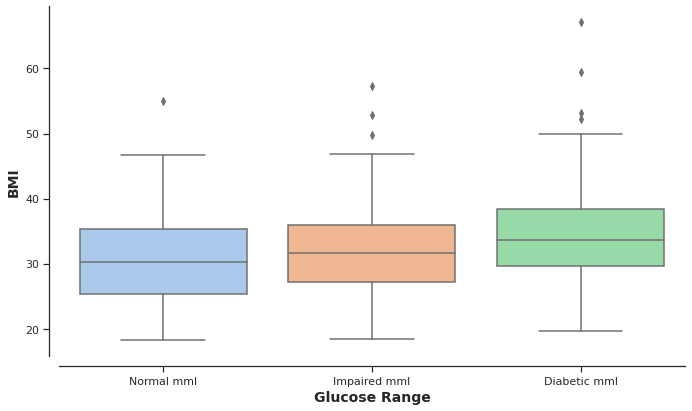

In [375]:
#Visualizing Relationship between Glucose and BMI
fig, ax = plt.subplots()
sns.boxplot(x="GlucoseRange", y="BMI",
            data=df, palette='pastel')

sns.despine(offset=10, trim=False)
fig.set_size_inches(10, 6)
plt.xlabel('Glucose Range',weight = 'bold', fontsize=14)
plt.ylabel('BMI',weight = 'bold', fontsize=14)

print(plt)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>


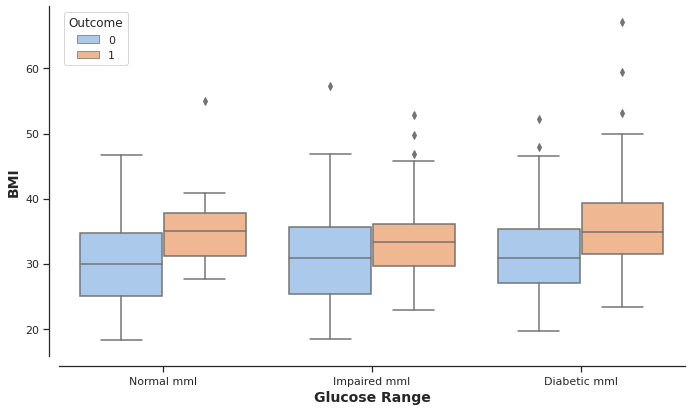

In [376]:
#Accounting for diabetes outcomes
fig, ax = plt.subplots()
sns.boxplot(x="GlucoseRange", y="BMI", hue='Outcome',
            data=df, palette='pastel')

sns.despine(offset=10, trim=False)
fig.set_size_inches(10, 6)
plt.xlabel('Glucose Range',weight = 'bold', fontsize=14)
plt.ylabel('BMI',weight = 'bold', fontsize=14)

print(plt)

Text(29.335, 0.5, 'BMI')

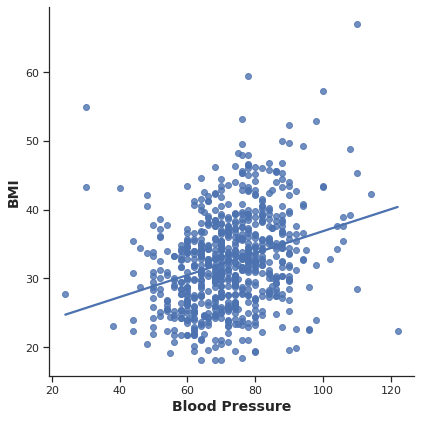

In [377]:
#Discovering relationship between Blood Pressure and BMI 
sns.lmplot(x='BloodPressure', y='BMI', data=df, palette='muted', height=6, ci=None)

plt.xlabel('Blood Pressure',weight = 'bold', fontsize=14)
plt.ylabel('BMI',weight = 'bold', fontsize=14)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>


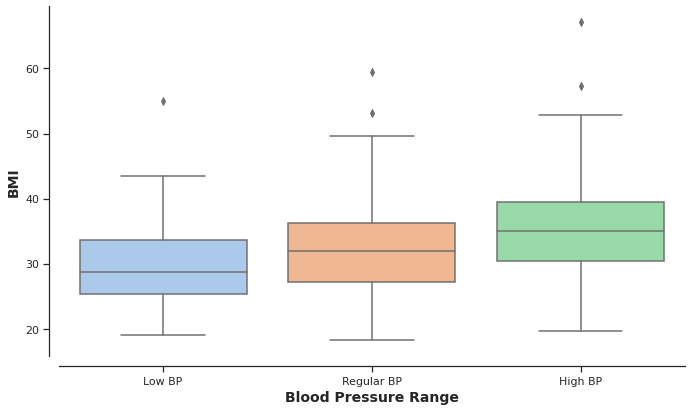

In [378]:
#Visualizing Relationship between Blood Pressure and BMI
fig, ax = plt.subplots()
sns.boxplot(x="BloodPressureRange", y="BMI",
            data=df, palette='pastel')

sns.despine(offset=10, trim=False)
fig.set_size_inches(10, 6)
plt.xlabel('Blood Pressure Range',weight = 'bold', fontsize=14)
plt.ylabel('BMI',weight = 'bold', fontsize=14)

print(plt)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>


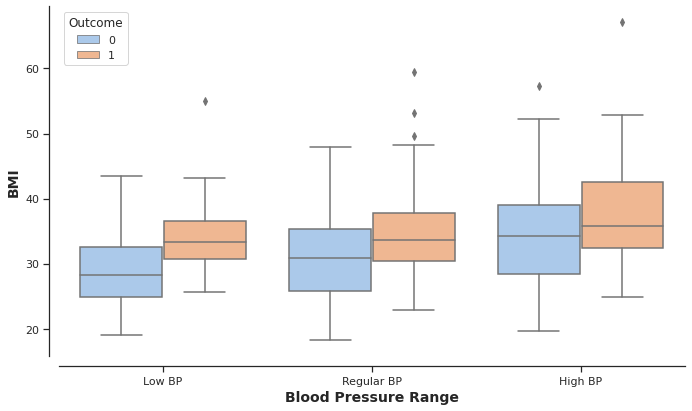

In [379]:
#Accounting for diabetes outcomes
fig, ax = plt.subplots()
sns.boxplot(x="BloodPressureRange", y="BMI", hue="Outcome",
            data=df, palette='pastel')

sns.despine(offset=10, trim=False)
fig.set_size_inches(10, 6)
plt.xlabel('Blood Pressure Range',weight = 'bold', fontsize=14)
plt.ylabel('BMI',weight = 'bold', fontsize=14)

print(plt)

# Paired T Tests

H0: mu1 = mu2 = mu3

In [380]:
#Pairwise t-tests (independent function)
print("Pairwise Mean T-Tests (Independent)")
print("")

tStat, pValue = stats.ttest_ind(df['BMI'], df['BloodPressure'], axis=0)
print("BMI - Blood Pressure:")
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
print("")

tStat, pValue = stats.ttest_ind(df['BMI'], df['Glucose'], axis=0)
print("BMI - Glucose:")
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
print("")

tStat, pValue = stats.ttest_ind(df['BloodPressure'], df['Glucose'], axis=0)
print("Blood Pressure - Glucose:")
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
print("")

Pairwise Mean T-Tests (Independent)

BMI - Blood Pressure:
P-Value:0.0 T-Statistic:-75.84237669145601

BMI - Glucose:
P-Value:0.0 T-Statistic:-76.34885746518364

Blood Pressure - Glucose:
P-Value:1.4495039696308685e-237 T-Statistic:-40.165441465229556



# MLR Predictive Model

In [381]:
#Building MLR Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df[['Glucose', 'BloodPressure']]
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Glucose           0.026688
BloodPressure     0.136328

In [382]:
#Testing MLR Model
y_pred = regressor.predict(X_test)
MLR = pd.DataFrame({'Actual BMI': y_test, 'Predicted BMI': y_pred})
MLR.head()

Actual BMI  Predicted BMI
607        19.5      30.232373
529        24.6      31.148431
623        43.5      31.376374
506        36.5      36.398112
274        34.2      31.696631

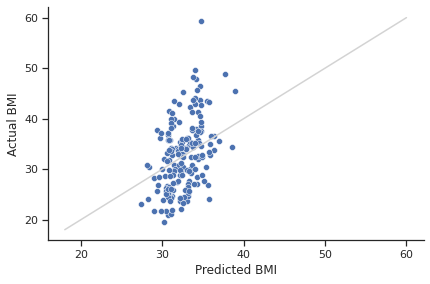

In [383]:
#Plotting MLR Predictions vs Actual
fig, ax = plt.subplots()
sns.scatterplot(x='Predicted BMI', y='Actual BMI', data=MLR, palette='muted',ci=None)
ax.plot([18, 60], [18, 60], color='lightgrey')
sns.despine()

In [384]:
#Running metrics on MLR
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 5.019000167451072
Mean Squared Error: 38.577668750063154
Root MSE: 6.211092395872336
R Squared: 0.16475078115031627


# 1 Way ANOVA & Post Hoc Analysis (Blood Pressure - BMI)

H0: Blood Pressure will have no effect on BMI

In [385]:
from statsmodels.formula.api import ols

In [386]:
#1 way ANOVA Model for Blood Pressure Range
model = ols('BMI ~ C(BloodPressureRange)', 
            data=df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq     df          F        PR(>F)
C(BloodPressureRange)   2475.439585    2.0  28.030735  1.890166e-12
Residual               31836.338039  721.0        NaN           NaN

In [387]:
#Post hoc for BloodPressure Range
res = stat()
res.tukey_hsd(df=df, res_var='BMI', xfac_var='BloodPressureRange',
              anova_model='BMI ~ C(BloodPressureRange)'
             )
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1   group2      Diff     Lower     Upper    q-value   p-value
0  Regular BP   Low BP  2.372450  0.775189  3.969712   4.933430  0.001495
1  Regular BP  High BP  3.401315  1.969856  4.832774   7.892158  0.001000
2      Low BP  High BP  5.773765  3.905428  7.642103  10.264351  0.001000

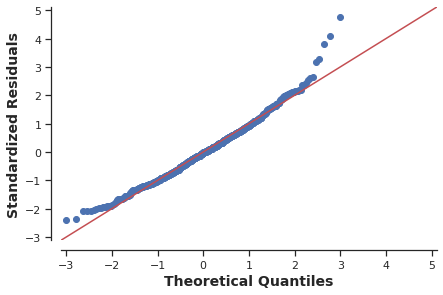

In [388]:
#QQPlot of Blood Pressure ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles", weight='bold', size=14)
plt.ylabel("Standardized Residuals", weight='bold', size=14)

sns.despine(offset=10, trim=False)

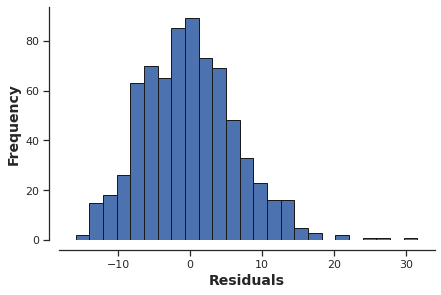

In [389]:
#Histogram of Blood Pressure ANOVA
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals", weight='bold', size=14)
plt.ylabel("Frequency", weight='bold', size=14)
sns.despine(offset=10, trim=False)

In [390]:
#Wilks-shapiro test for Blood Pressure ANOVA
w, pvalue = stats.shapiro(model.resid)

print("Wilks-Shapiro w")
print(w)
print("")
print ("Wilks-Shapiro p-val")
print(pvalue)

Wilks-Shapiro w
0.9835794568061829

Wilks-Shapiro p-val
2.9622103170368064e-07


# 1 Way ANOVA & Post Hoc Analysis (Glucose - BMI)

H0: Glucose Levels will have no effect on BMI

In [391]:
#1 way ANOVA Model for Glucose Range
model = ols('BMI ~ C(GlucoseRange)', 
            data=df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq     df          F        PR(>F)
C(GlucoseRange)   1507.604208    2.0  16.567749  9.229112e-08
Residual         32804.173416  721.0        NaN           NaN

In [392]:
#Post hoc for Glucose Range
res = stat()
res.tukey_hsd(df=df, res_var='BMI', xfac_var='GlucoseRange',
              anova_model='BMI ~ C(GlucoseRange)'
             )
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1        group2      Diff     Lower     Upper   q-value  \
0  Diabetic mml    Normal mml  3.558997  2.051223  5.066771  7.840057   
1  Diabetic mml  Impaired mml  2.198213  0.837302  3.559124  5.364976   
2    Normal mml  Impaired mml  1.360784 -0.172784  2.894352  2.947230   

    p-value  
0  0.001000  
1  0.001000  
2  0.093838

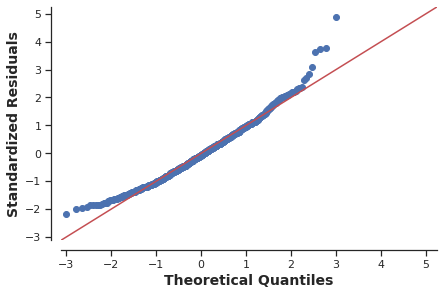

In [393]:
#QQPlot of Glucose ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles", weight='bold', size=14)
plt.ylabel("Standardized Residuals", weight='bold', size=14)

sns.despine(offset=10, trim=False)

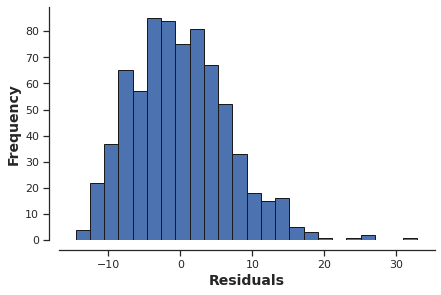

In [394]:
#Histogram of Glucose ANOVA
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')

plt.xlabel("Residuals", weight='bold', size=14)
plt.ylabel("Frequency", weight='bold', size=14)
sns.despine(offset=10, trim=False)

In [395]:
#Wilks-shapiro test for Glucose ANOVA
w, pvalue = stats.shapiro(model.resid)

print("Wilks-Shapiro w")
print(w)
print("")
print ("Wilks-Shapiro p-val")
print(pvalue)

Wilks-Shapiro w
0.9779493808746338

Wilks-Shapiro p-val
5.519321888414197e-09


# 2 Way ANOVA & Post-Hoc Analysis

H0: Glucose Levels will have no effect on BMI

H0: Blood Pressure will have no effect on BMI

H0: Glucose Levels and Blood Pressure interaction will have no effect on BMI

In [396]:
#2 way ANOVA Model
model = ols('BMI ~ C(GlucoseRange) + C(BloodPressureRange) + C(GlucoseRange):C(BloodPressureRange)', 
            data=df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq     df          F  \
C(GlucoseRange)                          726.089170    2.0   8.387011   
C(BloodPressureRange)                   1693.924547    2.0  19.566417   
C(GlucoseRange):C(BloodPressureRange)    160.380258    4.0   0.926271   
Residual                               30949.868612  715.0        NaN   

                                             PR(>F)  
C(GlucoseRange)                        2.509787e-04  
C(BloodPressureRange)                  5.330940e-09  
C(GlucoseRange):C(BloodPressureRange)  4.480269e-01  
Residual                                        NaN

In [397]:
#Post hoc test for main effect Glucose Range
res = stat()
res.tukey_hsd(df=df, res_var='BMI', xfac_var='GlucoseRange',
              anova_model='BMI ~ C(GlucoseRange) + C(BloodPressureRange) + C(GlucoseRange):C(BloodPressureRange)'
             )
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1        group2      Diff     Lower     Upper   q-value  \
0  Diabetic mml    Normal mml  3.558997  2.088300  5.029694  8.037847   
1  Diabetic mml  Impaired mml  2.198213  0.870767  3.525659  5.500325   
2    Normal mml  Impaired mml  1.360784 -0.135073  2.856641  3.021583   

    p-value  
0  0.001000  
1  0.001000  
2  0.083382

In [398]:
#Post hoc test for main effect Blood Pressure Range
res = stat()
res.tukey_hsd(df=df, res_var='BMI', xfac_var='BloodPressureRange', 
              anova_model='BMI ~ C(GlucoseRange) + C(BloodPressureRange) + C(GlucoseRange):C(BloodPressureRange)'
             )
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1   group2      Diff     Lower     Upper    q-value   p-value
0  Regular BP   Low BP  2.372450  0.790962  3.953939   4.982720  0.001315
1  Regular BP  High BP  3.401315  1.983992  4.818638   7.971009  0.001000
2      Low BP  High BP  5.773765  3.923877  7.623654  10.366903  0.001000

In [399]:
#Interaction effect
res = stat()
res.tukey_hsd(df=df, res_var='BMI', xfac_var=['GlucoseRange','BloodPressureRange'], 
              anova_model='BMI ~ C(GlucoseRange) + C(BloodPressureRange) + C(GlucoseRange):C(BloodPressureRange)'
             )
res.tukey_summary.head()

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:368: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1                    group2      Diff     Lower  \
0  (Diabetic mml, Regular BP)    (Diabetic mml, Low BP)  2.850996 -1.234135   
1  (Diabetic mml, Regular BP)   (Diabetic mml, High BP)  1.889105 -0.747835   
2  (Diabetic mml, Regular BP)  (Normal mml, Regular BP)  3.100820  0.571681   
3  (Diabetic mml, Regular BP)      (Normal mml, Low BP)  4.809401  1.369914   
4  (Diabetic mml, Regular BP)     (Normal mml, High BP)  0.216234 -4.545522   

      Upper   q-value   p-value  
0  6.936127  3.070770  0.428681  
1  4.526046  3.152191  0.390130  
2  5.629959  5.394617  0.004658  
3  8.248889  6.152533  0.001000  
4  4.977989  0.199808  0.900000

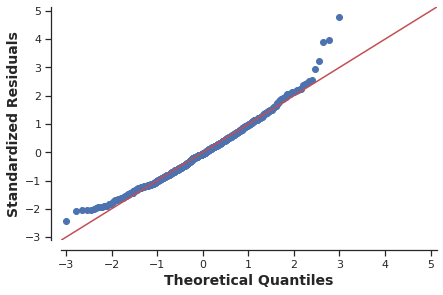

In [400]:
#QQPlot of ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles", weight='bold', size=14)
plt.ylabel("Standardized Residuals", weight='bold', size=14)

sns.despine(offset=10, trim=False)

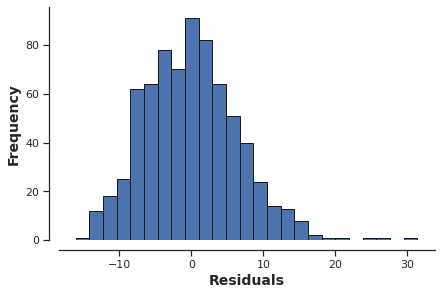

In [401]:
#Histogram of ANOVA
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals", weight='bold', size=14)
plt.ylabel("Frequency", weight='bold', size=14)

sns.despine(offset=10, trim=False)

In [402]:
#Wilks-shapiro test
w, pvalue = stats.shapiro(model.resid)
print("Wilks-Shapiro w")
print(w)
print("")
print ("Wilks-Shapiro p-val")
print(pvalue)

Wilks-Shapiro w
0.9838648438453674

Wilks-Shapiro p-val
3.6948731008124014e-07


## ANCOVAs & Post-Hoc Analysis

In [403]:
from pingouin import ancova

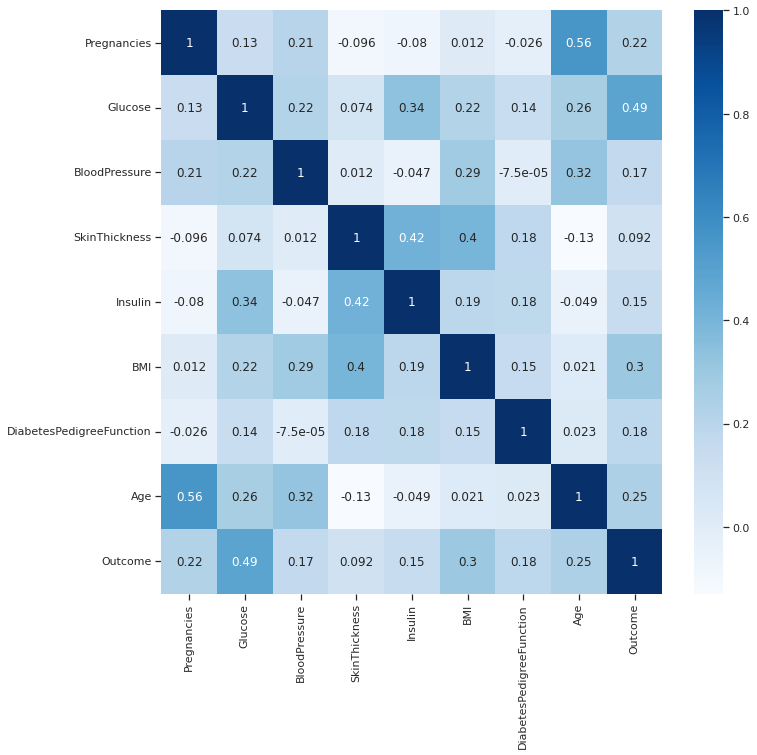

In [404]:
#Determining most appropriate covariate using heatmap
#Age shares a strong correlation with both Glucose & BP
fig, ax = plt.subplots()
sns.heatmap(df.corr(),annot=True,cmap='Blues')

fig.set_size_inches(10, 10)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.show()

In [405]:
#Exploring Glucose as Predictor of BMI using Age as a covariate
ancova(data=df,dv='BMI',covar='Age',between='GlucoseRange')

Source            SS   DF          F         p-unc       np2
0  GlucoseRange   1538.052331    2  16.902278  6.707274e-08  0.044845
1           Age     45.343257    1   0.996591  3.184723e-01  0.001382
2      Residual  32758.830159  720        NaN           NaN       NaN

Text(0, 0.5, 'BMI')

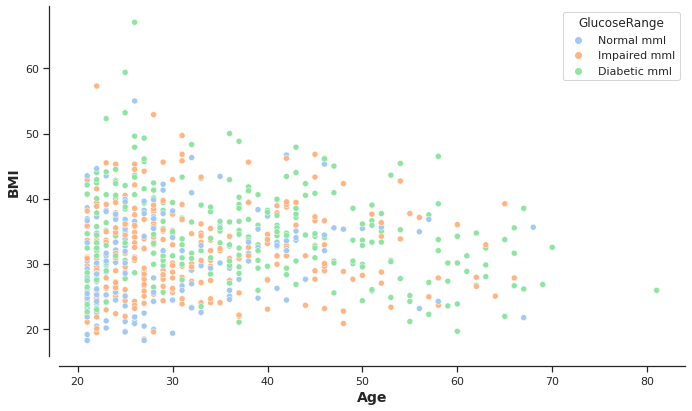

In [406]:
#Visualizing Relationship
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Age', y='BMI', hue='GlucoseRange', palette='pastel')

sns.despine(offset=10, trim=False)
fig.set_size_inches(10, 6)
plt.xlabel('Age',weight = 'bold', fontsize=14)
plt.ylabel('BMI',weight = 'bold', fontsize=14)

In [407]:
#Post hoc test for Glucose ANCOVA
res = stat()
res.tukey_hsd(df=df, res_var='BMI', xfac_var='GlucoseRange', 
              anova_model='BMI ~ C(GlucoseRange) + Age'
             )
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1        group2      Diff     Lower     Upper   q-value  p-value
0  Diabetic mml    Normal mml  3.558997  2.051215  5.066779  7.840038  0.00100
1  Diabetic mml  Impaired mml  2.198213  0.837295  3.559131  5.364963  0.00100
2    Normal mml  Impaired mml  1.360784 -0.172792  2.894360  2.947223  0.09384

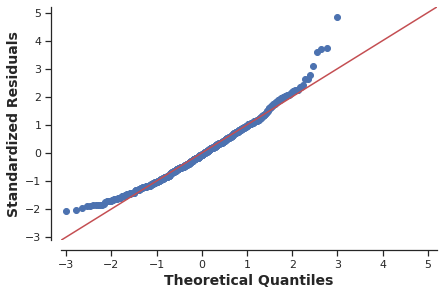

In [408]:
#QQPlot of ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles", weight='bold', size=14)
plt.ylabel("Standardized Residuals", weight='bold', size=14)

sns.despine(offset=10, trim=False)

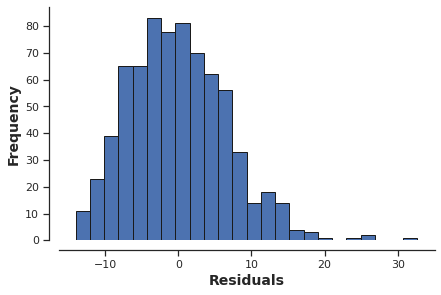

In [409]:
#Histogram of ANOVA
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals", weight='bold', size=14)
plt.ylabel("Frequency", weight='bold', size=14)

sns.despine(offset=10, trim=False)

In [410]:
#Wilks-shapiro test
model = ols('BMI ~ C(GlucoseRange) + Age', data=df).fit()
w, pvalue = stats.shapiro(model.resid)
print("Wilks-Shapiro w")
print(w)
print("")
print ("Wilks-Shapiro p-val")
print(pvalue)

Wilks-Shapiro w
0.9784700870513916

Wilks-Shapiro p-val
7.766947085485754e-09


In [411]:
#Exploring Blood Pressure as Predictor of BMI using Age as a covariate
ancova(data=df,dv='BMI',covar='Age',between='BloodPressureRange')

Source            SS   DF          F         p-unc       np2
0  BloodPressureRange   2553.930603    2  28.964383  7.968188e-13  0.074465
1                 Age     93.386151    1   2.118203  1.459931e-01  0.002933
2            Residual  31742.951888  720        NaN           NaN       NaN

Text(0, 0.5, 'BMI')

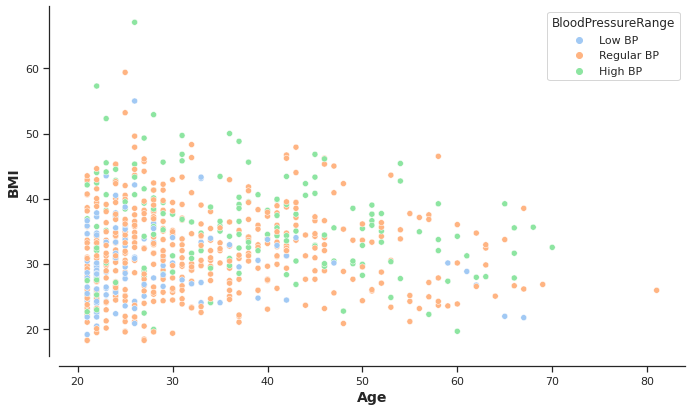

In [412]:
#Visualizing Relationship
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Age', y='BMI', hue='BloodPressureRange', palette='pastel')

sns.despine(offset=10, trim=False)
fig.set_size_inches(10, 6)
plt.xlabel('Age',weight = 'bold', fontsize=14)
plt.ylabel('BMI',weight = 'bold', fontsize=14)

In [413]:
#Post hoc test for Blood pressure ANCOVA
res = stat()
res.tukey_hsd(df=df, res_var='BMI', xfac_var='BloodPressureRange', 
              anova_model='BMI ~ C(BloodPressureRange) + Age'
             )
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1   group2      Diff     Lower     Upper    q-value   p-value
0  Regular BP   Low BP  2.372450  0.776422  3.968479   4.937254  0.001479
1  Regular BP  High BP  3.401315  1.970961  4.831669   7.898275  0.001000
2      Low BP  High BP  5.773765  3.906869  7.640662  10.272308  0.001000

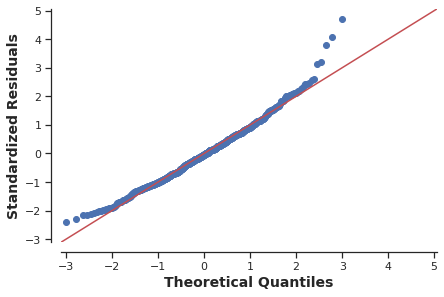

In [414]:
#QQPlot of ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles", weight='bold', size=14)
plt.ylabel("Standardized Residuals", weight='bold', size=14)

sns.despine(offset=10, trim=False)

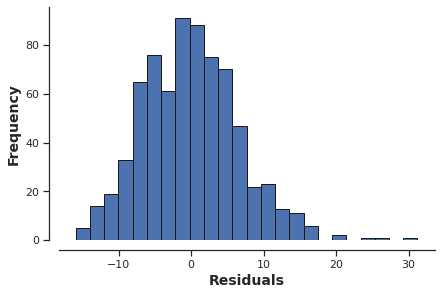

In [415]:
#Histogram of ANOVA
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals", weight='bold', size=14)
plt.ylabel("Frequency", weight='bold', size=14)

sns.despine(offset=10, trim=False)

In [416]:
#Wilks-shapiro test
model = ols('BMI ~ C(BloodPressureRange) + Age', data=df).fit()

w, pvalue = stats.shapiro(model.resid)
print("Wilks-Shapiro w")
print(w)
print("")
print ("Wilks-Shapiro p-val")
print(pvalue)

Wilks-Shapiro w
0.9850664734840393

Wilks-Shapiro p-val
9.596147947377176e-07


## Power Analysis

In [417]:
from statsmodels.stats.power import TTestIndPower, FTestAnovaPower
from scipy.stats import ttest_ind
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

In [432]:
#Parameters for Power Analysis
effect_size = 0.8 #Looking for large effect size
alpha = 0.05 #Standard significance level
power = 0.8 #Standard power level

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)

print('Sample Size Required Under Existing Parameters')
print('{0:.2f}'.format(sample_size))

Sample Size Required Under Existing Parameters
25.52


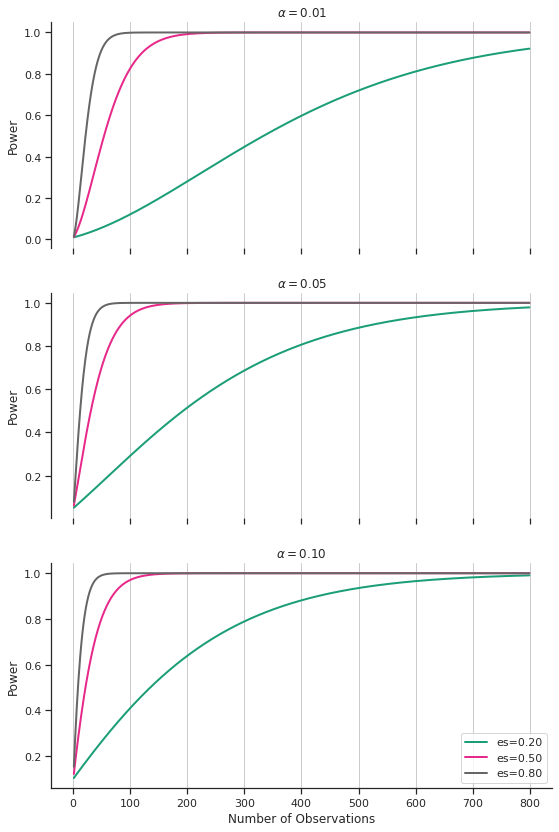

In [419]:
#Plotting different parameters for T Test Power
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 800),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, 
                                 title=r'$\alpha = 0.01$')
plt.ylabel('Power', fontsize=12)
ax.set(xlabel=None)
ax.set(xticklabels=[])
ax.xaxis.grid(True)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()


ax = fig.add_subplot(3,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 800),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
plt.ylabel('Power', fontsize=12)
ax.set(xlabel=None)
ax.set(xticklabels=[])
ax.xaxis.grid(True)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

ax = fig.add_subplot(3,1,3)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 800),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.10,
                                 ax=ax, title=r'$\alpha = 0.10$') 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True)


plt.ylabel('Power', fontsize=12)

fig.set_size_inches(8, 8)


fig.subplots_adjust(top = 1.4)

In [424]:
#Power of both Blood Pressure and Glucose ANOVAs
print("F Test ANOVA Power")
print(FTestAnovaPower().solve_power(effect_size = None,power=0.8, nobs = 724, alpha = 0.05, k_groups= 3))

F Test ANOVA Power
0.11559848761806331


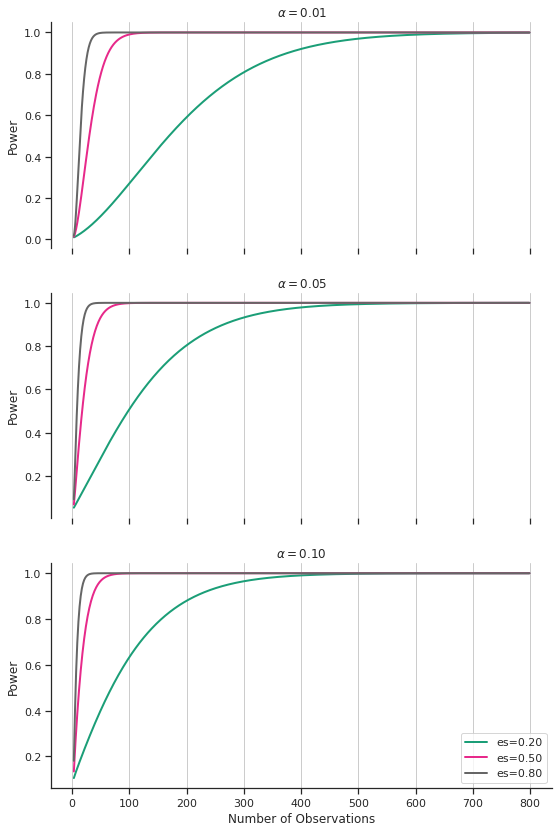

In [421]:
#Plotting different parameters for F Test ANOVA Power
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
fig = FTestAnovaPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 800),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, 
                                 title=r'$\alpha = 0.01$')
plt.ylabel('Power', fontsize=12)
ax.set(xlabel=None)
ax.set(xticklabels=[])
ax.xaxis.grid(True)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()


ax = fig.add_subplot(3,1,2)
fig = FTestAnovaPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 800),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
plt.ylabel('Power', fontsize=12)
ax.set(xlabel=None)
ax.set(xticklabels=[])
ax.xaxis.grid(True)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

ax = fig.add_subplot(3,1,3)
fig = FTestAnovaPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 800),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.10,
                                 ax=ax, title=r'$\alpha = 0.10$') 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True)


plt.ylabel('Power', fontsize=12)

fig.set_size_inches(8, 8)


fig.subplots_adjust(top = 1.4)